## Preprocessing with NSMC

* For sentiment analysis, we use the Naver Movie Corpus (https://github.com/e9t/nsmc/)

In [1]:
def read_documents(filename):
    # NSMC import function
    with open(filename, encoding="utf-8") as f:
        documents = [line.split('\t')for line in f.read().splitlines()]
        documents = documents[1:]
    return documents
    
train_docs = read_documents("/Users/shim/dl-python-SentimentAnalysis/data/ratings_train.txt")
test_docs = read_documents("/Users/shim/dl-python-SentimentAnalysis/data/ratings_test.txt")

In [2]:
print(len(train_docs))
print(len(test_docs))

150000
50000


### Function definitions

In [3]:
def text_cleaning(doc):
    # A function to remove letters except Korean.
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
    return doc

def define_stopwords(path):
    
    SW = set()
    # How to add a boolean 1.
    # SW.add("there is")
    
    # How to add a stopword 2.
    # Add directly to stopwords-en.txt
    with open(path) as f:
        for word in f:
            SW.add(word)
            
    return SW

def text_tokenizing(doc):
    return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]

### Tokenizes the imported data with part-of-speech tags.

In [4]:
# Since there are 200,000 texts, it takes time to clean them.
# Let's organize the code so that once it's created, 
# it can be loaded when the code is run again without having to refine it again.
from konlpy.tag import Mecab
from konlpy.tag import Okt
import json
import os
import re
from pprint import pprint

okt = Okt()
mecab = Mecab()

SW = define_stopwords("/Users/shim/dl-python-SentimentAnalysis/Konlpy/stopwords-ko.txt")

# Since there are 200,000 texts, it takes time to clean them.
# Let's organize the code so that once it's created, 
# it can be loaded when the code is run again without having to refine it again.

if os.path.exists('train_docs.json'):
    with open("train_docs.json", encoding='utf-8') as f:
        train_data = json.load(f)
else:
    train_data = [(text_tokenizing(line[1]), line[2]) for line in train_docs if text_tokenizing(line[1])]
#     train_data = []
#     for line in train_docs:
#         if text_tokenizing(line[1]):
#             train_data.append((text_tokenzing(line[1]), line[2]))
    
    with open("train_docs.json", 'w', encoding='utf-8') as f:
        json.dump(train_data, f, ensure_ascii=False, indent='\t')

        
if os.path.exists('test_docs.json'):
    with open("test_docs.json", encoding='utf-8') as f:
        test_data = json.load(f)
else:
    test_data = [(text_tokenizing(line[1]), line[2]) for line in test_docs if text_tokenizing(line[1])]
    
    with open("test_docs.json", 'w', encoding='utf-8') as f:
        json.dump(test_data, f, ensure_ascii=False, indent='\t')

        

pprint(train_data[0])
pprint(test_data[0])


[['진짜', '짜증', '네요', '목소리'], '0']
[['GDNTOPCLASSINTHECLUB'], '0']


### Analyze the histogram using NLTK

* Check basic information to analyze the data.

* Perform preprocessing using the NLTK library.

In [5]:
import nltk

total_tokens = [token for doc in train_data for token in doc[0]]
print(len(total_tokens))

1206399


In [6]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

51787
[('영화', 57621),
 ('..', 22813),
 ('는데', 11507),
 ('너무', 11002),
 ('정말', 9783),
 ('으로', 9322),
 ('네요', 9052),
 ('재밌', 9023),
 ('지만', 8403),
 ('진짜', 8327)]


### Histogram

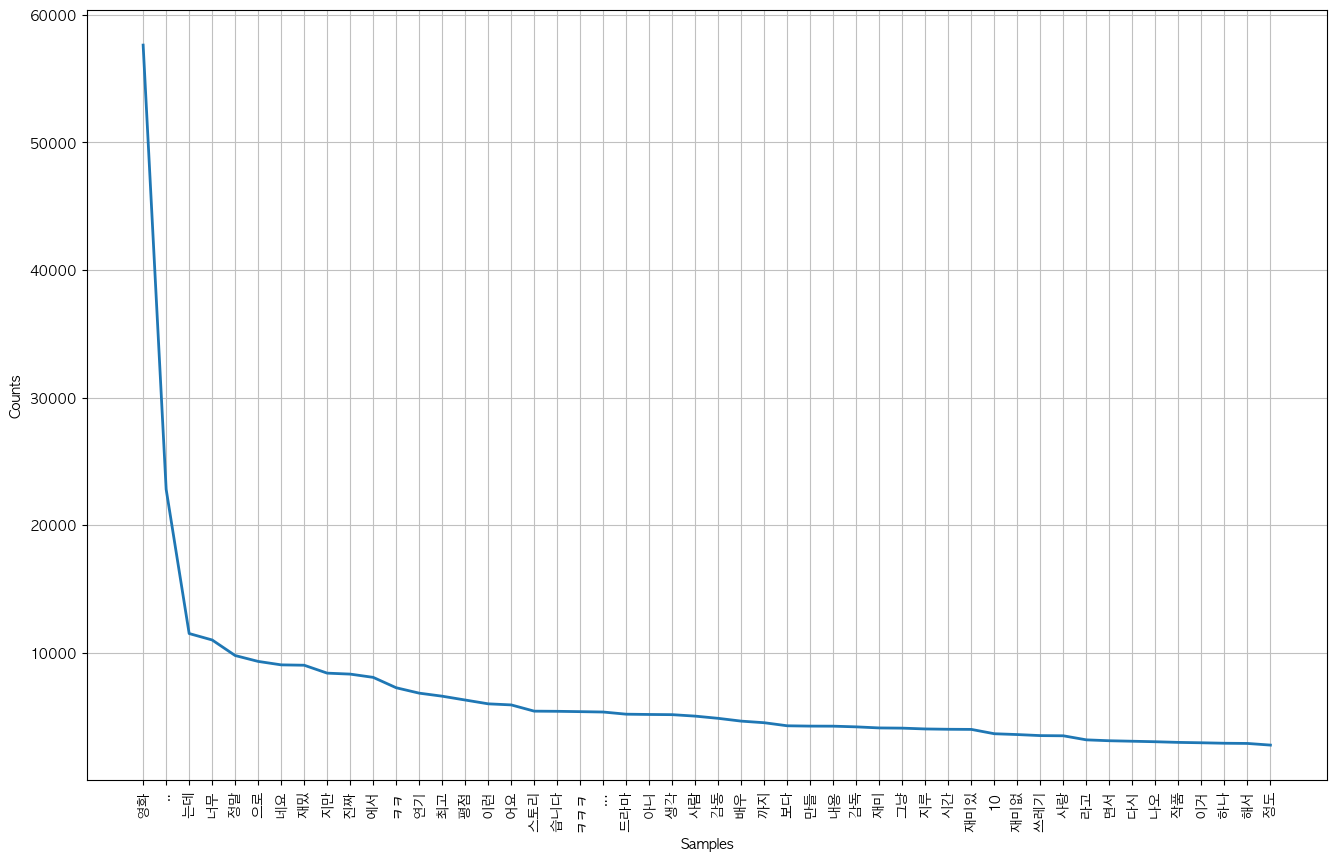

<Axes: xlabel='Samples', ylabel='Counts'>

In [8]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50) #Top 50 most frequent words

### WordCloud

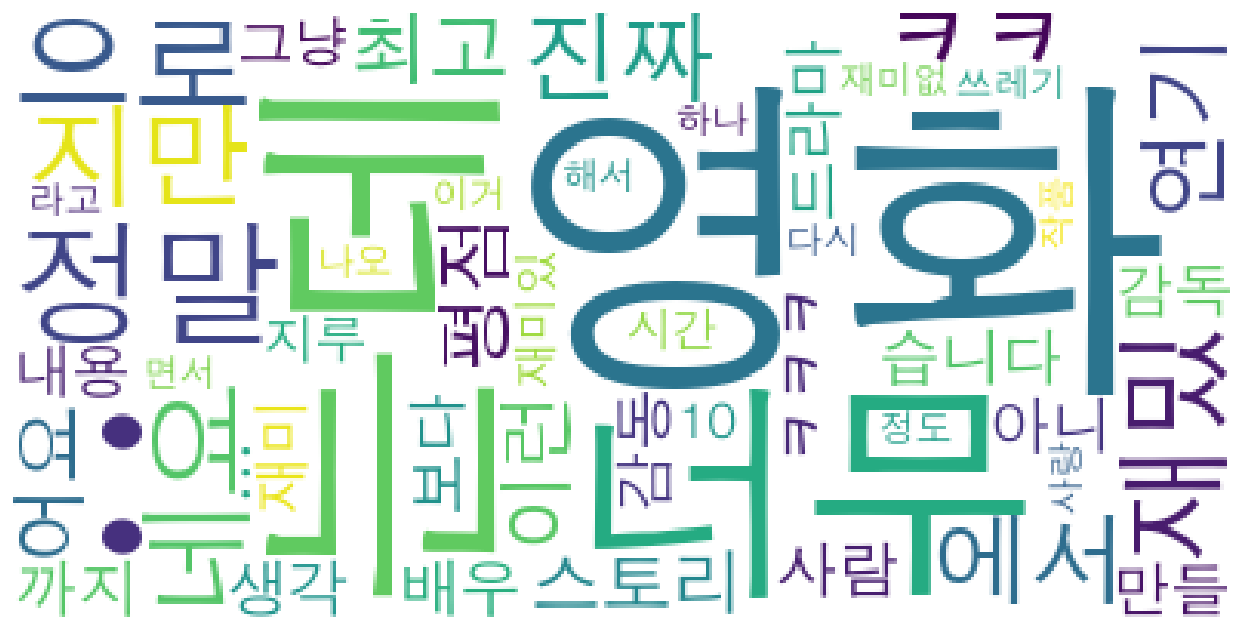

In [17]:
from wordcloud import WordCloud

data = text.vocab().most_common(50)

# for windows : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()